c:\users\i040924\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


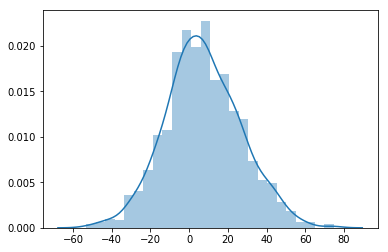

In [9]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


tf.reset_default_graph()
data = np.random.normal(loc=7,scale=20,size=1000)

mu = tf.Variable(tf.random_normal((),mean=5,stddev=100, dtype=tf.float32))
phi = tf.Variable(tf.random_normal((),mean=5,stddev=100, dtype=tf.float32))
sigma = tf.square(phi)

x = tf.placeholder(dtype=tf.float32)

gaussian_dist = tf.contrib.distributions.Normal(loc=mu, scale=sigma)

log_prob = gaussian_dist.log_prob(value=x)

neg_log_likelihood = -1.0 * tf.reduce_sum(log_prob)

sample = gaussian_dist.sample()
_ = sns.distplot(data)

Sample:  12850.297
(1000,)
(1000,)


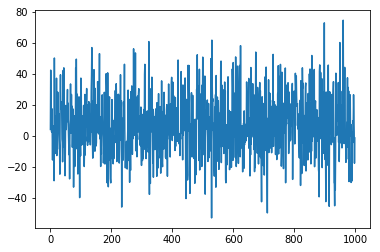

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    result = sess.run( [log_prob,sample], {x:data})
    print("Sample: ", result[1])
    
print(data.shape)
print(result[0].shape)
plt.plot(data)


[7.2268496, 4.410399]


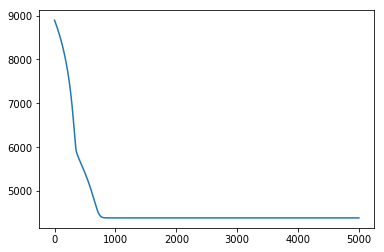

In [11]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(neg_log_likelihood)

losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(5000):
        _,loss = sess.run([train_op,neg_log_likelihood],{ x: data})
        losses.append(loss)
    print(sess.run([mu,phi]))
    
plt.plot(losses)

It is possible to mix different distributions too

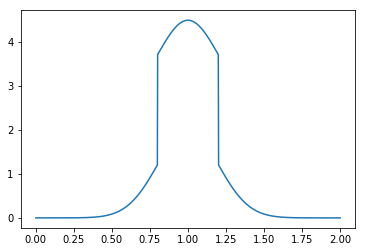

In [4]:

u = 1.0
sigma = 0.2
normal = tf.distributions.Normal(loc=u,scale=sigma)

low= u-sigma
high = u+sigma
uniform = tf.distributions.Uniform(low,high)

x = tf.placeholder(tf.float32,shape=(None,))
y = normal.prob(x) + uniform.prob(x)

x_data = np.linspace(0.0001,2,1000)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    y_data = sess.run(y,feed_dict={x:x_data})
    
    plt.plot(x_data,y_data)